In [52]:
import pandas as pd
lb = 'iwgsc_10_12_18'

In [53]:
srna_file = 'data/res/' + lb + '/ShortStack_D.gff3'
df = pd.read_csv(srna_file,sep="\t",header=None, comment='#')
df.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
print('sRNA len:',len(df.index))

sRNA len: 28703


In [54]:
results_file = 'data/res/' + lb + '/Results.txt'
df_res = pd.read_csv(results_file,sep="\t")
df_res = df_res[df_res.DicerCall.isin(['21','22', '23','24'])]
print('Res len:',len(df_res.index))

Res len: 28652


In [55]:
counts_file = 'data/res/' + lb +  '/counts.named.csv'
df_counts = pd.read_csv(counts_file,sep="\t")
print('Counts len:',len(df_counts.index))

Counts len: 38487


In [56]:
df_counts = df_counts[df_counts.Name.isin(df_res.Name.tolist())]
print('Counts filtered len:',len(df_counts.index))

Counts filtered len: 28652


In [57]:
df_counts.head()

,Locus,Name,main,21dpiR1C.trimmed,21dpiR3C.trimmed,21dpiR1T.trimmed,21dpiR3T.trimmed
125,1A:227128-227333,Cluster_126,71,27,11,24,9
269,1A:1314729-1315026,Cluster_270,183,45,47,48,43
270,1A:2477642-2478951,Cluster_271,400,78,87,143,92
271,1A:2480744-2481189,Cluster_272,83,30,19,17,17
272,1A:2489920-2490403,Cluster_273,114,27,30,32,25


In [62]:
counts_file = 'data/res/' + lb +  '/counts.unnamed.csv'
df_counts_u = pd.read_csv(counts_file,sep="\t",index_col=False)
print('Counts len:',len(df_counts_u.index))

Counts len: 82444


In [63]:
df_counts_u.head()

,Locus,Name,main,21dpiR1C.trimmed,21dpiR3C.trimmed,21dpiR1T.trimmed,21dpiR3T.trimmed
0,AAAAAGCUCGUAGUU,NaN,717,111,140,262,204
1,AAAAGAGAGUCAAAG,NaN,2291,777,267,771,476
2,AAAAGCUCGUAGUUG,NaN,386,100,77,105,104
3,AAAAGGACUUUGAAA,NaN,186,55,21,68,42
4,AAAAGGAUUGGCUCU,NaN,1867,455,141,871,400


In [64]:
df_counts_u['Locus'] = df_counts_u['Locus'].str.strip()
df_counts_u['Name'] = df_counts_u['Locus']
df_counts_u = df_counts_u[(df_counts_u.Locus.str.len() >= 20) & (df_counts_u.Locus.str.len() <= 24)]
print('Counts len:',len(df_counts_u.index))

Counts len: 27748


In [65]:
df_concat = pd.concat([df_counts,df_counts_u])

In [66]:
df_concat.to_csv('data/res/' + lb + '/counts_filtered.csv', sep='\t', index=None)

In [7]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

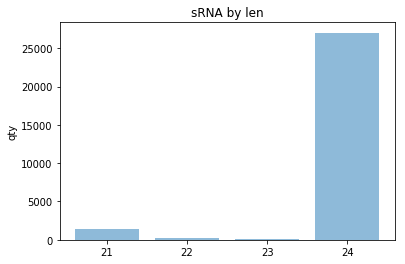

In [8]:
objects = ('21', '22','23', '24')
y_pos = np.arange(len(objects))
y21 = len(df_res[df_res.DicerCall == '21'].index)
y22 = len(df_res[df_res.DicerCall == '22'].index)
y23 = len(df_res[df_res.DicerCall == '23'].index)
y24 = len(df_res[df_res.DicerCall == '24'].index)
performance = [y21, y22,  y23, y24]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('qty')
plt.title('sRNA by len')
plt.show()

In [9]:
y21 = len(df_res[df_res.DicerCall == '21'].index)
y22 = len(df_res[df_res.DicerCall == '22'].index)
y23 = len(df_res[df_res.DicerCall == '23'].index)
y24 = len(df_res[df_res.DicerCall == '24'].index)
y21, y22, y23, y24

(1368, 207, 50, 27027)

35679    24
35680    24
35681    24
35682    24
35683    24
35684    24
35685    24
35686    24
35687    24
35688    24
35689    24
35690    24
35691    24
35692    24
35693    24
35694    24
35695    24
35696    24
35697    24
35698    24
35699    24
35700    24
35701    24
35702    24
35703    24
35704    24
35705    24
35706    24
35707    24
35708    24
         ..
82414    50
82415    50
82416    50
82417    50
82418    50
82419    50
82420    50
82421    50
82422    50
82423    50
82424    50
82425    50
82426    50
82427    50
82428    50
82429    50
82430    50
82431    50
82432    50
82433    50
82434    50
82435    50
82436    50
82437    50
82438    50
82439    50
82440    50
82441    50
82442    50
82443    50
Name: Locus, Length: 46765, dtype: int64